In [15]:
import dill
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
%matplotlib inline

# Let's turn those time series into something usable!

To start, let's un-serialize our normalized and annotated training data slices

In [2]:
data = dill.load(open('normalized_stock_price_slices.pkl', 'r'))

In [3]:
data[0][3]

([('2015-12-08', -0.12174738784081005),
  ('2015-12-09', -0.11649757460863203),
  ('2015-12-10', -0.12202718753675167),
  ('2015-12-11', -0.10701232720700836),
  ('2015-12-14', -0.098575729382038818),
  ('2015-12-15', -0.1192150549485034),
  ('2015-12-16', -0.13214151674067587),
  ('2015-12-17', -0.11797484551305558),
  ('2015-12-18', -0.082288199923163566),
  ('2015-12-21', -0.1143065235110669),
  ('2015-12-22', -0.11929035332875815),
  ('2015-12-23', -0.11892191948170955),
  ('2015-12-24', -0.12568038792527547),
  ('2015-12-28', -0.12710162195805946),
  ('2015-12-29', -0.12395220359326434),
  ('2015-12-30', -0.1227671908381152),
  ('2015-12-31', -0.092712355058081633),
  ('2016-01-04', -0.083297778426778893),
  ('2016-01-05', -0.082662390476770778),
  ('2016-01-06', -0.090411169273986777),
  ('2016-01-07', -0.066076615447791726),
  ('2016-01-08', -0.090436371473833085),
  ('2016-01-11', -0.086162818845528177),
  ('2016-01-12', -0.13408592795608898),
  ('2016-01-13', -0.09178504259157

I'm going to start feature extraction with a library I found called [tsfresh](http://tsfresh.readthedocs.io/en/latest/index.html). There were a handful of libraries avalible, but this one appears to have the most permissive licensure, and the simplest usage.

In [4]:
from tsfresh import extract_features

/opt/conda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


tsfresh expects time series data, so lets see if theres an easy way to either convert these vectors back into dataframes, or ideally, I'll just go back to an early notebook and serialize those dataframe slices.

Starting with a subset of the data:

In [18]:
testCase = data[10]

In [19]:
testCase

('GSK',
 '2014-01-09',
 '0',
 ([('2013-07-19', 0.59753691197201864),
   ('2013-07-22', 0.5822248552149405),
   ('2013-07-23', 0.59558587616312131),
   ('2013-07-24', 0.60284455947574811),
   ('2013-07-25', 0.59591167456038352),
   ('2013-07-26', 0.58503519897257916),
   ('2013-07-29', 0.5868058582933583),
   ('2013-07-30', 0.56458473197073666),
   ('2013-07-31', 0.56046905164658378),
   ('2013-08-01', 0.55760516047572217),
   ('2013-08-02', 0.56834216000382409),
   ('2013-08-05', 0.5679572253910653),
   ('2013-08-06', 0.5909445841231824),
   ('2013-08-07', 0.58861085253235312),
   ('2013-08-08', 0.59084402712413953),
   ('2013-08-09', 0.59288500471966521),
   ('2013-08-12', 0.59798148969432119),
   ('2013-08-13', 0.61068250366747856),
   ('2013-08-14', 0.61584094131787215),
   ('2013-08-15', 0.63562311296763407),
   ('2013-08-16', 0.64223514609473531),
   ('2013-08-19', 0.64149564858734498),
   ('2013-08-20', 0.64053328457900793),
   ('2013-08-21', 0.63473390998347645),
   ('2013-08-22

In [31]:
testFrame = pd.DataFrame(testCase[3][0])

In [36]:
testFrame['tick'] = "foo"

In [39]:
testFrame

,0,1,tick
0,2013-07-19,0.597537,foo
1,2013-07-22,0.582225,foo
2,2013-07-23,0.595586,foo
3,2013-07-24,0.602845,foo
4,2013-07-25,0.595912,foo
5,2013-07-26,0.585035,foo
6,2013-07-29,0.586806,foo
7,2013-07-30,0.564585,foo
8,2013-07-31,0.560469,foo
9,2013-08-01,0.557605,foo


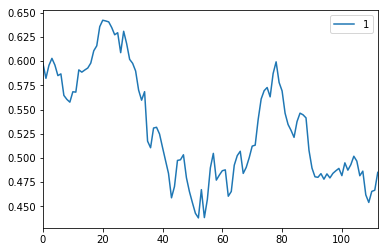

In [33]:
testFrame.plot()

In [40]:
extracted_features = extract_features(testFrame, column_sort=0, column_id='tick')

Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


In [42]:
extracted_features

variable,1__abs_energy,1__absolute_sum_of_changes,"1__agg_autocorrelation__f_agg_""mean""","1__agg_autocorrelation__f_agg_""median""","1__agg_autocorrelation__f_agg_""var""","1__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","1__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","1__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","1__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","1__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,1__time_reversal_asymmetry_statistic__lag_1,1__time_reversal_asymmetry_statistic__lag_2,1__time_reversal_asymmetry_statistic__lag_3,1__value_count__value_-inf,1__value_count__value_0,1__value_count__value_1,1__value_count__value_inf,1__value_count__value_nan,1__variance,1__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
foo,32.229542,1.299248,0.084719,-0.056621,0.227267,0.620049,-0.727673,-0.012046,0.003591,0.65133,...,-0.001171,-0.002635,-0.003923,0.0,0.0,0.0,0.0,0.0,0.003103,0.0


In [43]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

In [47]:
impute(extracted_features)
features_filtered = select_features(extracted_features, np.ndarray(int(testCase[2])))

ValueError: X must contain at least two samples.